# **Decision Trees**


In [27]:
# Import modules and libraries

import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

import matplotlib.pyplot as plt
np.random.seed(1234)

## Iris dataset

The Iris is a classical machine learning dataset (https://en.wikipedia.org/wiki/Iris_flower_data_set), composed of Iris plants. 
The iris samples in question fall into three species: Iris setosa, Iris versicolor, and Iris virginica. The objective is to classify plants based on the lengths and widths of their petals and sepals


In [43]:
# Import the dataset using the sklearn library
from sklearn import datasets
dataset = datasets.load_iris()

# We will be using the first two features
x, y = dataset['data'][:,:2], dataset['target']
(num_instances, num_features), num_classes = x.shape, np.max(y)+1
print ("number of instances (Dataset size):", num_instances)
print ("number of features:", num_features)
print ("number of classes:", num_classes)

number of instances (Dataset size): 150
number of features: 2
number of classes: 3


In [46]:
#train-test split
inds = np.random.permutation(num_instances)
x_train, y_train = x[inds[:100]], y[inds[:100]]
x_test, y_test = x[inds[100:]], y[inds[100:]]

print("Training set size:", x_train.shape, y_train.shape)
print("Testing set size:", x_test.shape, y_test.shape)

Training set size: (100, 2) (100,)
Testing set size: (50, 2) (50,)


In [51]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Create a DT model 
model = DecisionTreeClassifier(max_depth=5)

# We fit the model with train data
model.fit(x_train, y_train)

# Make the predictions for test part
y_pred = model.predict(x_test)

# Compare 
correct = y_test == y_pred

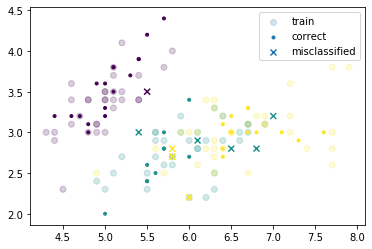

accuracy is 80.0.


In [52]:

incorrect = np.logical_not(correct)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')
plt.legend()
plt.show()
accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
print(f'accuracy is {accuracy*100:.1f}.')


In [53]:
x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)
x0,x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

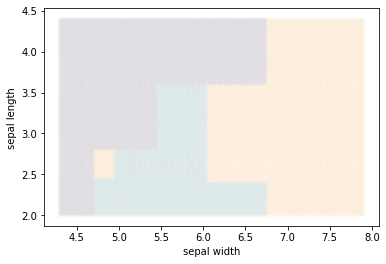

In [57]:
y_train_prob = np.zeros((y_train.shape[0], num_classes))
y_train_prob[np.arange(y_train.shape[0]), y_train] = 1
y_prob_all = model.fit(x_train, y_train).predict(x_all)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train_prob, marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all, marker='.', alpha=.01)
plt.ylabel('sepal length')
plt.xlabel('sepal width')
plt.show()

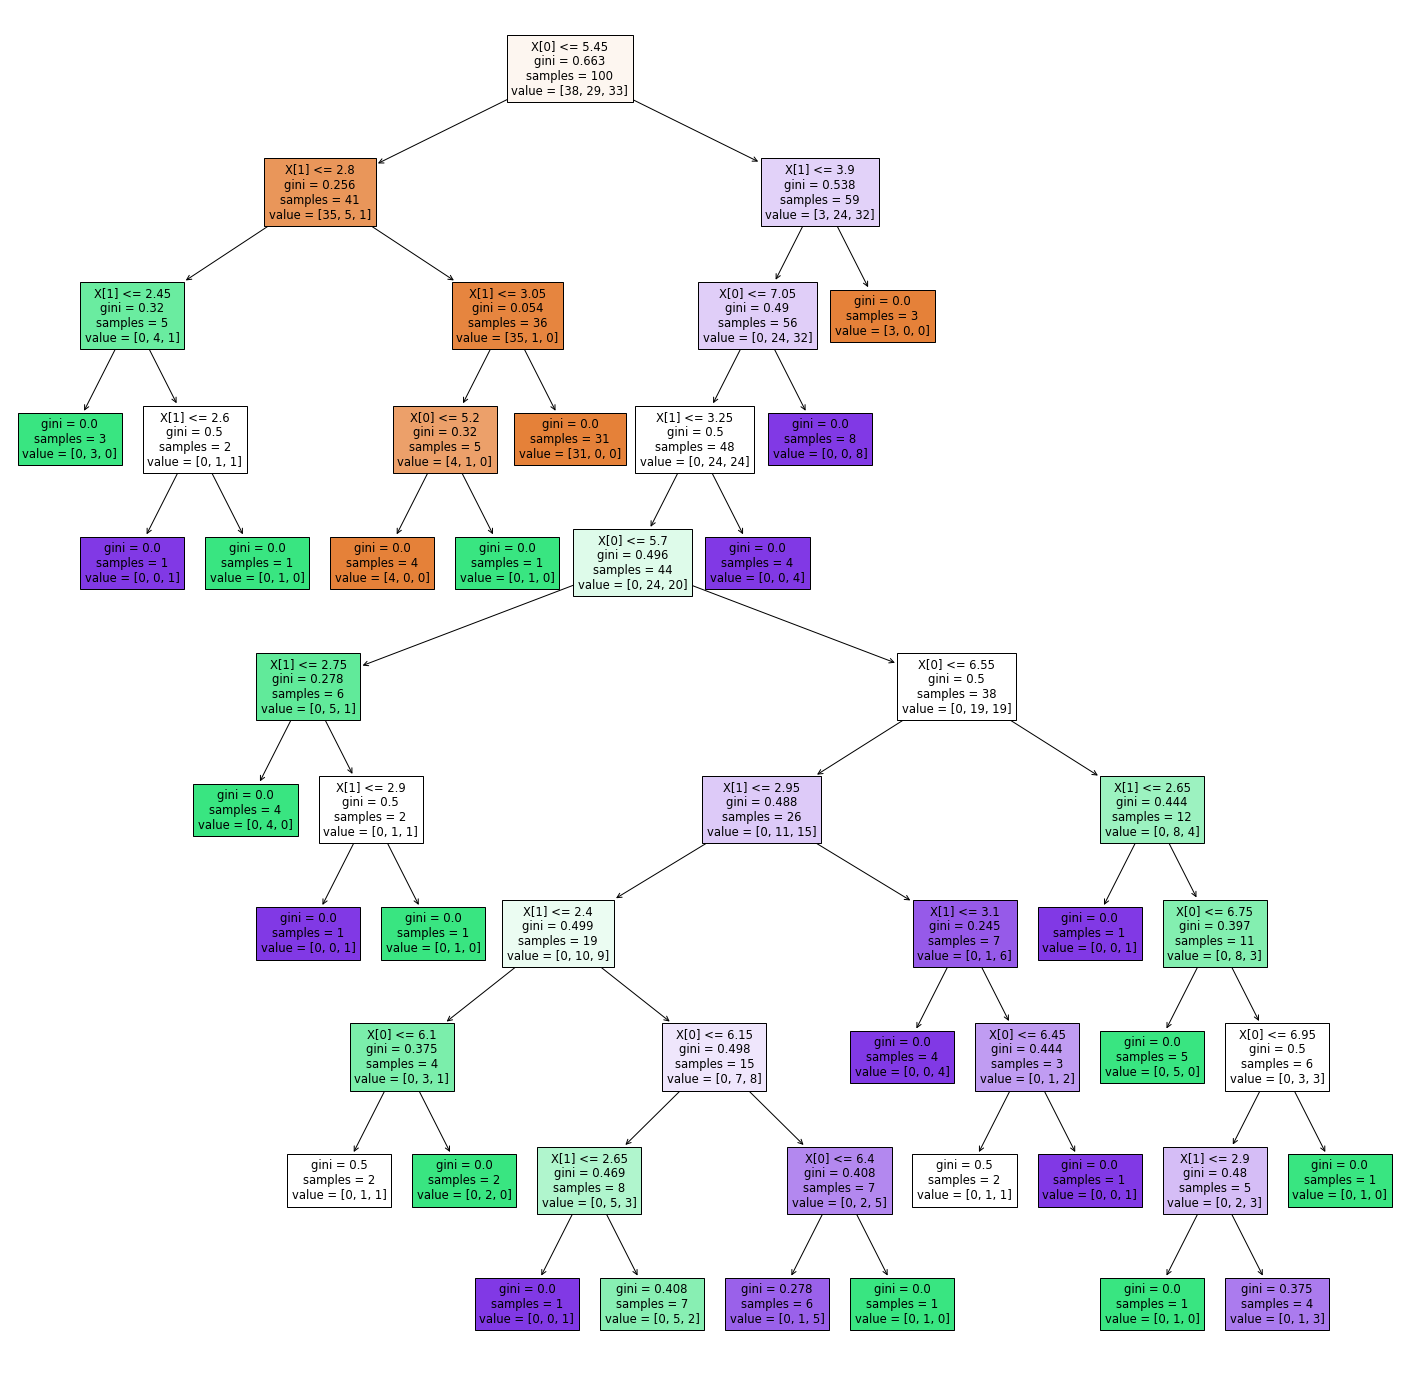

In [42]:
plt.figure(figsize = (25,25))
# Plot the decision tree, showing the decisive values and the improvements in Gini impurity along the way.
plot_tree(model, filled=True)
# Display the tree plot figure.
plt.show()